In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
df = pd.read_csv('food_coded.csv')
df

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135


In [2]:
print(df.describe(include='all').T)

                 count unique   top freq    mean       std  min  25%  50%  \
GPA                123     38   3.5   13     NaN       NaN  NaN  NaN  NaN   
Gender             125    NaN   NaN  NaN   1.392  0.490161    1    1    1   
breakfast          125    NaN   NaN  NaN   1.112  0.316636    1    1    1   
calories_chicken   125    NaN   NaN  NaN  577.32   131.214  265  430  610   
calories_day       106    NaN   NaN  NaN  3.0283  0.639308    2    3    3   
...                ...    ...   ...  ...     ...       ...  ...  ...  ...   
type_sports        104     67  none    8     NaN       NaN  NaN  NaN  NaN   
veggies_day        125    NaN   NaN  NaN   4.008   1.08134    1    3    4   
vitamins           125    NaN   NaN  NaN   1.512  0.501867    1    1    2   
waffle_calories    125    NaN   NaN  NaN  1073.4   248.667  575  900  900   
weight             123     47   140    8     NaN       NaN  NaN  NaN  NaN   

                   75%   max  
GPA                NaN   NaN  
Gender       

In [3]:
from pandas import read_csv

df = read_csv("food_coded.csv")

In [4]:
import re
data = read_csv("food_coded.csv")
features = data.columns
features_by_dtype = {}
for f in features:
    dtype = str(data[f].dtype)
    
    if dtype not in features_by_dtype.keys():
        features_by_dtype[dtype] = [f]
    else:
        features_by_dtype[dtype] += [f]
#print(features_by_dtype)
        
textual_features = features_by_dtype["object"]
numerical_features = ["weight","GPA"]
binary_category_features = ["Gender", "vitamins", "sports"]
calories_features = [i for i in features_by_dtype["int64"] if "calories" in i]
calories_features += ["calories_scone", "tortilla_calories"]
discrete_features = [i for i in features_by_dtype["int64"] if (not "calories" in i) & (data[i].unique().size > 2) & ("coded" not in i)]
discrete_features += ["calories_day","cook","exercise","father_education","income","life_rewarding","mother_education","persian_food"]
coded_features = [i for i in features_by_dtype["int64"] if (not "calories" in i) & (data[i].unique().size > 2) & ("coded" in i)]
coded_features += ["self_perception_weight", "comfort_food_reasons_coded", "cuisine", "employment", "fav_food", "marital_status","on_off_campus"]
image_questions = ["drink","soup","coffee", "fries", "breakfast"]

# === === #

def code(value, code_dictionary):
    if value in code_dictionary.keys():
        return code_dictionary[value]
    else:
        return value
    
def ordinalizer(data,feature):
    output = {}
    unique = sorted(data[feature].unique().tolist())
    j = 1
    for i in [i for i in unique if str(i) != "nan"]:
        output[i] = j
        j += 1
    return output
    
def code_features_as_ordinal(data, to_be_coded):
    for feature in to_be_coded:
        cd = ordinalizer(data,feature)
        data[feature] = data[feature].apply(code, code_dictionary=cd)
def gpa(value):
    try:
        return float(value)
    except:
        print(value)
        val=re.findall("\d+\.\d+", str(value))
        print(val)
        if not val:
            return np.nan
        else:
            return float(val[0])
        

code_features_as_ordinal(data,calories_features)
data['GPA']= data['GPA'].apply(gpa)

Personal 
[]
3.79 bitch
['3.79']
Unknown
[]


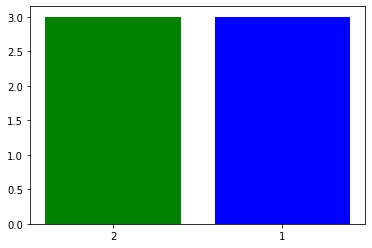

In [15]:
import matplotlib.pyplot as plt
categorical_features = binary_category_features + coded_features + image_questions
for c in categorical_features: data[c] = data[c].apply(str)
pass
fig = plt.figure()
langs = data['Gender']
plt.bar(langs,data['calories_scone'],color=['blue','green'])
plt.show()

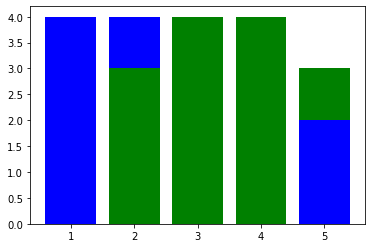

In [53]:
fig = plt.figure()
langs = data['cook']

plt.bar(langs,data['calories_day'],color=['blue','green'])
plt.show()

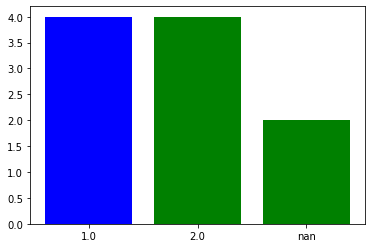

In [54]:
fig = plt.figure()
langs = data['sports']

plt.bar(langs,data['calories_day'],color=['blue','green'])
plt.show()

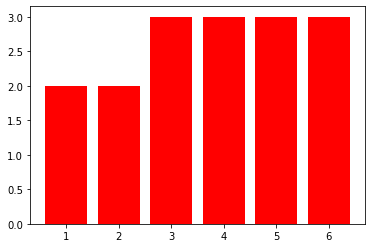

In [55]:
fig = plt.figure()
langs = data['income']

plt.bar(langs,data['exercise'],color=['red'])
plt.show()


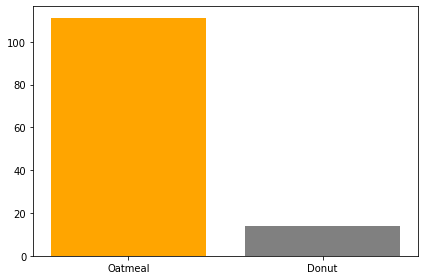

In [56]:
fig = plt.figure()
breakfast = data['breakfast'].value_counts()
labels = ['Oatmeal', 'Donut']
sizes = [breakfast[0], breakfast[1]]
colors = ['orange', 'gray']
plt.bar(labels, sizes,color=colors)
plt.tight_layout()
plt.show()

In [57]:
from pandas import get_dummies
one_hot_encoded_data = get_dummies(data[categorical_features])
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):  # more options can be specified also
    print(one_hot_encoded_data)

     Gender_1  Gender_2  vitamins_1  vitamins_2  sports_1.0  sports_2.0  \
0           0         1           1           0           1           0   
1           1         0           0           1           1           0   
..        ...       ...         ...         ...         ...         ...   
123         0         1           1           0           0           1   
124         1         0           0           1           0           1   

     sports_nan  comfort_food_reasons_coded.1_1  \
0             0                               0   
1             0                               1   
..          ...                             ...   
123           0                               0   
124           0                               0   

     comfort_food_reasons_coded.1_2  comfort_food_reasons_coded.1_3  \
0                                 0                               0   
1                                 0                               0   
..                           

In [58]:
target = ["GPA"]

from pandas import concat
x1 = one_hot_encoded_data
x2 = data[discrete_features + calories_features + target]
X = concat([x1,x2],1)

In [59]:
reg = linear_model.LinearRegression()

features = [x for x in X.columns if x != target[0]]
gpa_data = X[X[target[0]].notnull()].fillna(0)
xx = gpa_data[features]
yy = gpa_data[target[0]]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(yy)
#reg.fit(xx,yy)

0      2.400
1      3.654
2      3.300
3      3.200
4      3.500
5      2.250
6      3.800
7      3.300
8      3.300
9      3.300
10     3.500
11     3.904
12     3.400
13     3.600
14     3.100
16     4.000
17     3.600
18     3.400
19     2.200
20     3.300
21     3.870
22     3.700
23     3.700
24     3.900
25     2.800
26     3.700
27     3.000
28     3.200
29     3.500
30     4.000
31     4.000
32     3.400
33     2.800
34     3.650
35     3.000
36     3.700
37     3.400
38     3.890
39     3.000
40     3.400
41     2.900
42     3.600
43     3.500
44     3.200
45     3.605
46     3.800
47     2.800
48     3.500
49     3.830
50     3.600
51     3.300
52     3.300
53     3.292
54     3.500
55     3.350
56     3.800
57     2.800
58     3.500
59     3.700
60     3.600
62     3.900
63     2.600
64     3.500
65     3.200
66     3.000
67     3.600
68     3.200
69     3.670
70     3.730
71     4.000
72     3.100
73     3.790
74     2.710
75     3.000
76     3.700
77     3.100
78     3.000

In [60]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [61]:
X_train, X_test, y_train, y_test = train_test_split(xx,yy, test_size=0.2,shuffle=True)

In [62]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
predictions = reg.predict(X_test)
predictions

array([3.88119071, 3.40719944, 4.38079537, 3.38585959, 3.09170002,
       2.72425621, 1.31810355, 1.76424042, 1.46327008, 1.14287231,
       4.22177956, 3.44771526, 3.58829148, 3.79220278, 3.41146234,
       2.46726782, 3.15549221, 2.25068473, 4.0336253 , 3.62843574,
       2.91068609, 3.5913764 , 4.89376121, 3.672564  , 1.30860239])

In [64]:
for i,j in zip(y_test,predictions):
    print(i,j)

3.3 3.881190713304922
3.8 3.407199444406438
3.3 4.380795365675675
3.0 3.3858595865180328
3.4 3.091700023800041
3.4 2.724256205796111
3.4 1.3181035454683765
3.2 1.7642404195704269
3.4 1.463270080855109
3.83 1.1428723116113941
3.0 4.221779562623102
3.0 3.4477152590131257
3.2 3.5882914753003408
3.5 3.7922027787573525
3.5 3.41146233525913
2.9 2.4672678192368456
3.68 3.1554922063897006
3.5 2.2506847337913056
3.7 4.033625302439535
3.5 3.62843574076413
3.7 2.910686093623041
3.292 3.5913763992428334
3.0 4.893761207370339
3.5 3.6725640031493136
3.1 1.3086023903219135


1.2541614291456333


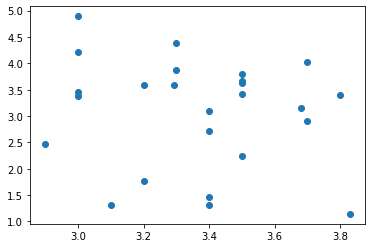

In [65]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,predictions))
plt.scatter(y_test, predictions)

In [66]:
from sklearn.ensemble import ExtraTreesRegressor

In [67]:
model = ExtraTreesRegressor()

In [68]:
model.fit(X_train,y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

0.09200319095600014


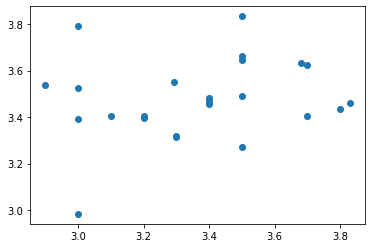

In [69]:
predictions = model.predict(X_test)
print(mean_squared_error(y_test,predictions))
plt.scatter(y_test, predictions)

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

In [71]:
model = GradientBoostingRegressor()

In [72]:
model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [73]:
predictions = model.predict(X_test)
mean_squared_error(y_test,predictions)

0.08369368675912138

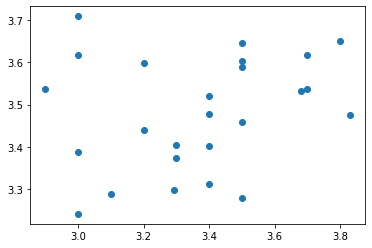

In [74]:
plt.scatter(y_test, predictions)